In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",False)

In [48]:
data = pd.read_csv("../datasets/adult.csv")

In [49]:
data.shape

(32561, 15)

In [50]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [51]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [52]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [53]:
data.duplicated().sum()

24

In [54]:
data.drop_duplicates(inplace=True)

In [55]:
data.duplicated().sum()

0

In [56]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [57]:
data.rename(
    columns =  {
        'education.num': 'education_num',
        'marital.status' : 'marital_status',
        'hours.per.week': 'hours_per_week_num',
        'capital.gain': 'capital_gain',
        'capital.loss': 'capital_loss',
        'native.country': 'native_country'
    },
    inplace=True
)

In [58]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week_num,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [59]:
num_col = data.select_dtypes(exclude="object").columns
cat_col = data.select_dtypes(include="object").columns

print(num_col)
print(cat_col)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week_num'],
      dtype='object')
Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [60]:
for col in cat_col:
    print(f"{col.upper()}\n{data[col].unique()}")
    print("*"*100)

WORKCLASS
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
****************************************************************************************************
EDUCATION
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
****************************************************************************************************
MARITAL_STATUS
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
****************************************************************************************************
OCCUPATION
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
****

In [61]:
# Detect ? symbols in columns
missing_col: list = []
for col in data.columns:
    if "?" in data[col].unique():
        missing_col.append(col)
print(missing_col)


['workclass', 'occupation', 'native_country']


In [62]:
for col in missing_col:
    data[col].replace("?",data[col].describe().top,inplace=True)

In [63]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week_num,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


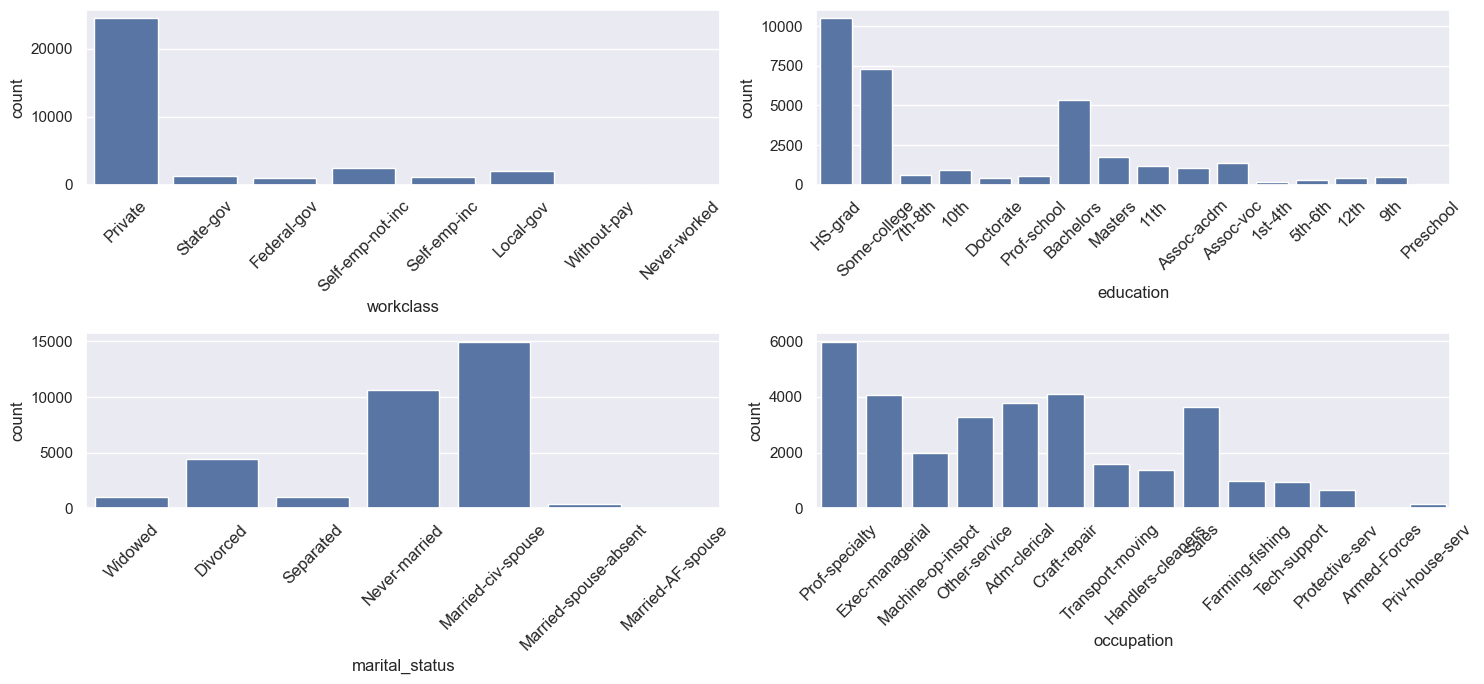

In [64]:
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(15,7)})


eda_col1 = ['workclass', 'education', 'marital_status', 'occupation']
eda_col2 = ['relationship', 'race', 'sex', 'income']

for i in range(len(eda_col1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[eda_col1[i]])
    plt.xticks(size=12,rotation=45)
    plt.tight_layout()

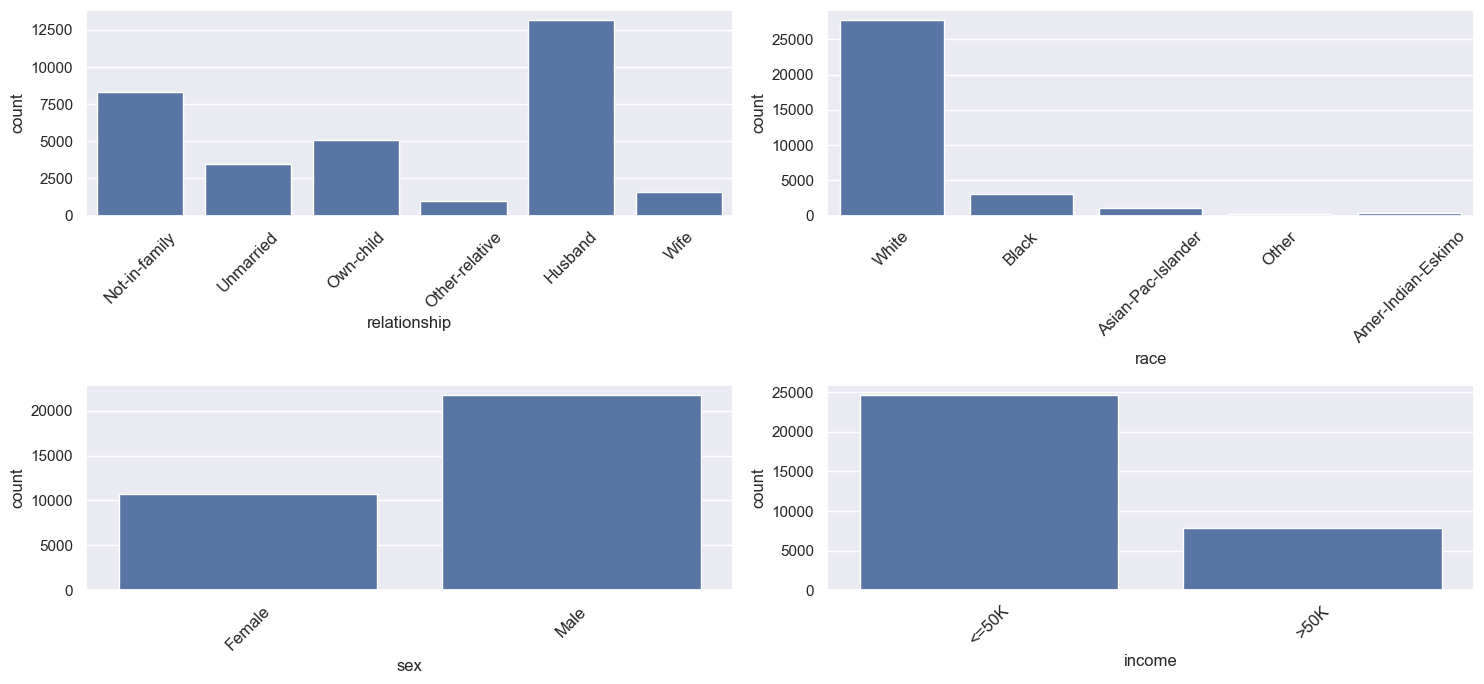

In [65]:
for i in range(len(eda_col2)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[eda_col2[i]])
    plt.xticks(size=12,rotation=45)
    plt.tight_layout()

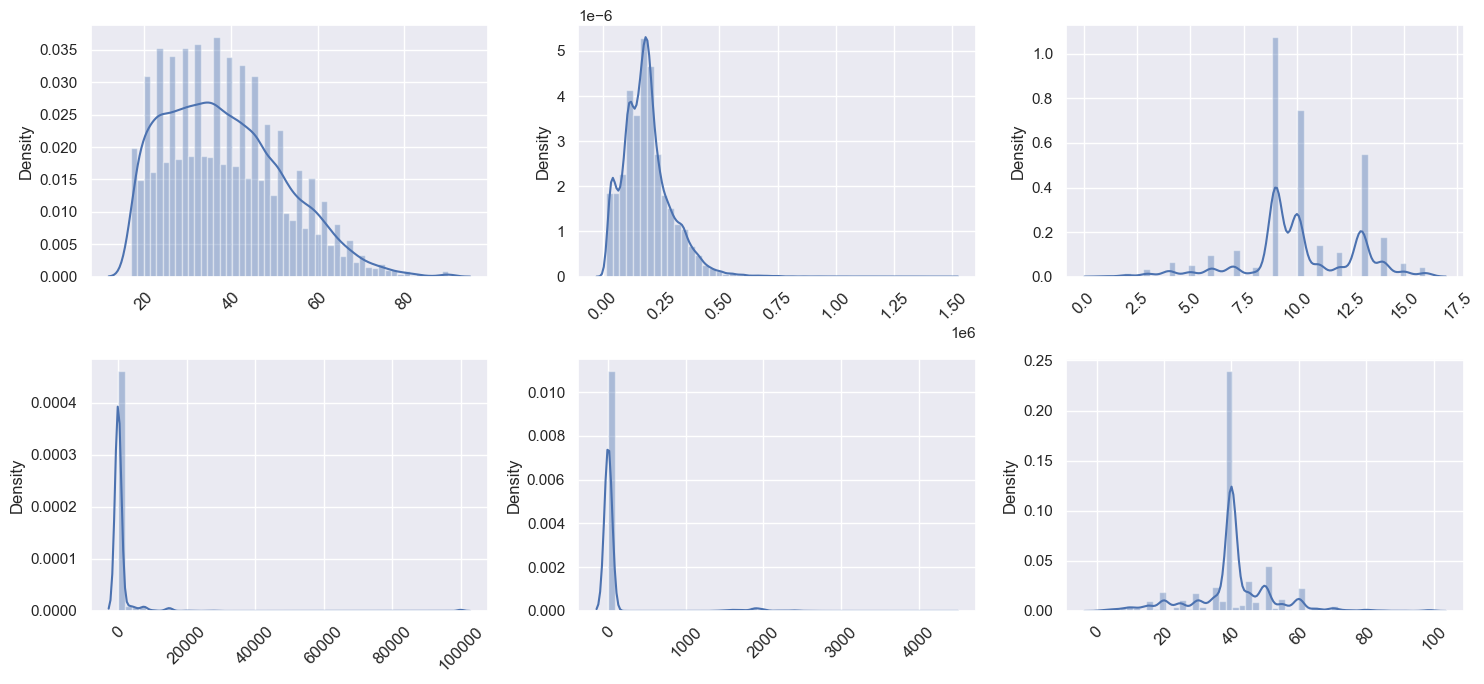

In [66]:
for i in range(len(num_col)):
    plt.subplot(2,3,i+1)
    sns.distplot(x=data[num_col[i]])
    plt.xticks(size=12,rotation=45)
    plt.tight_layout()

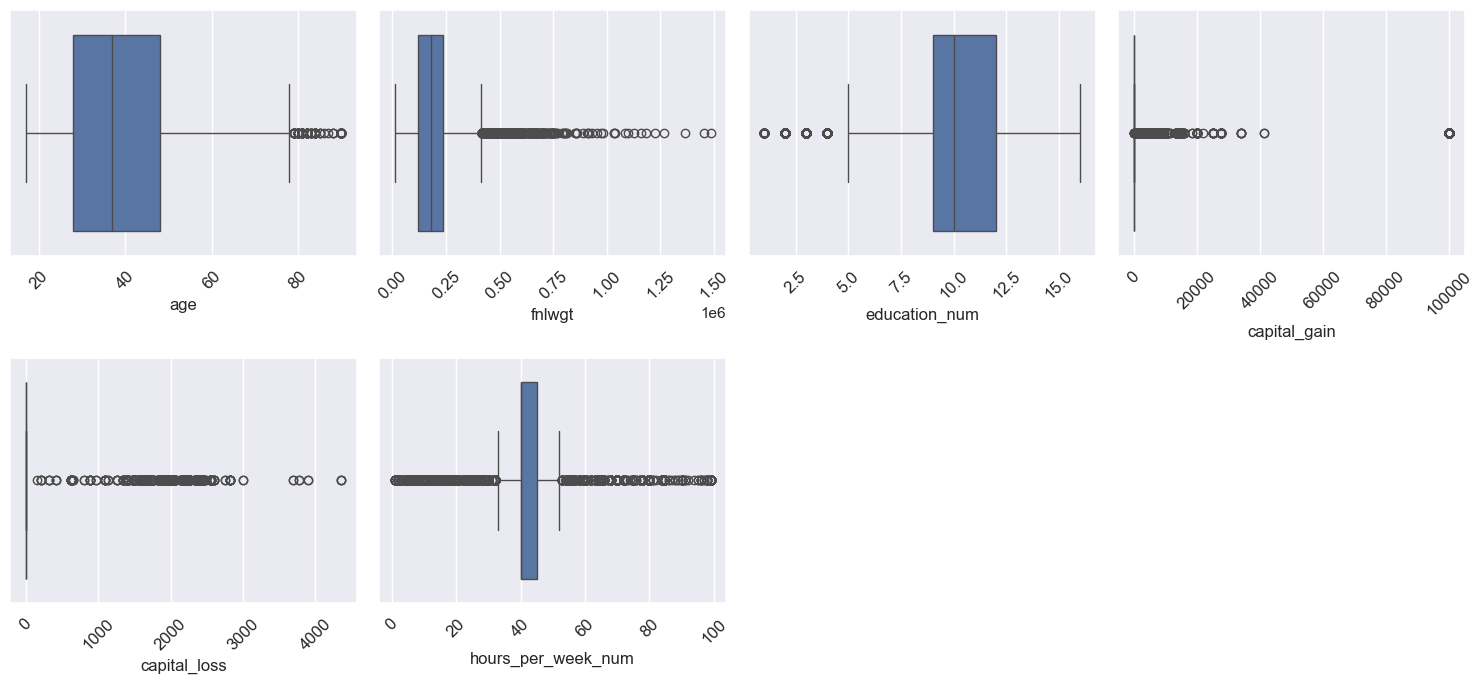

In [67]:
for i in range(len(num_col)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[num_col[i]])
    plt.xticks(size=12,rotation=45)
    plt.tight_layout()

<Axes: xlabel='income'>

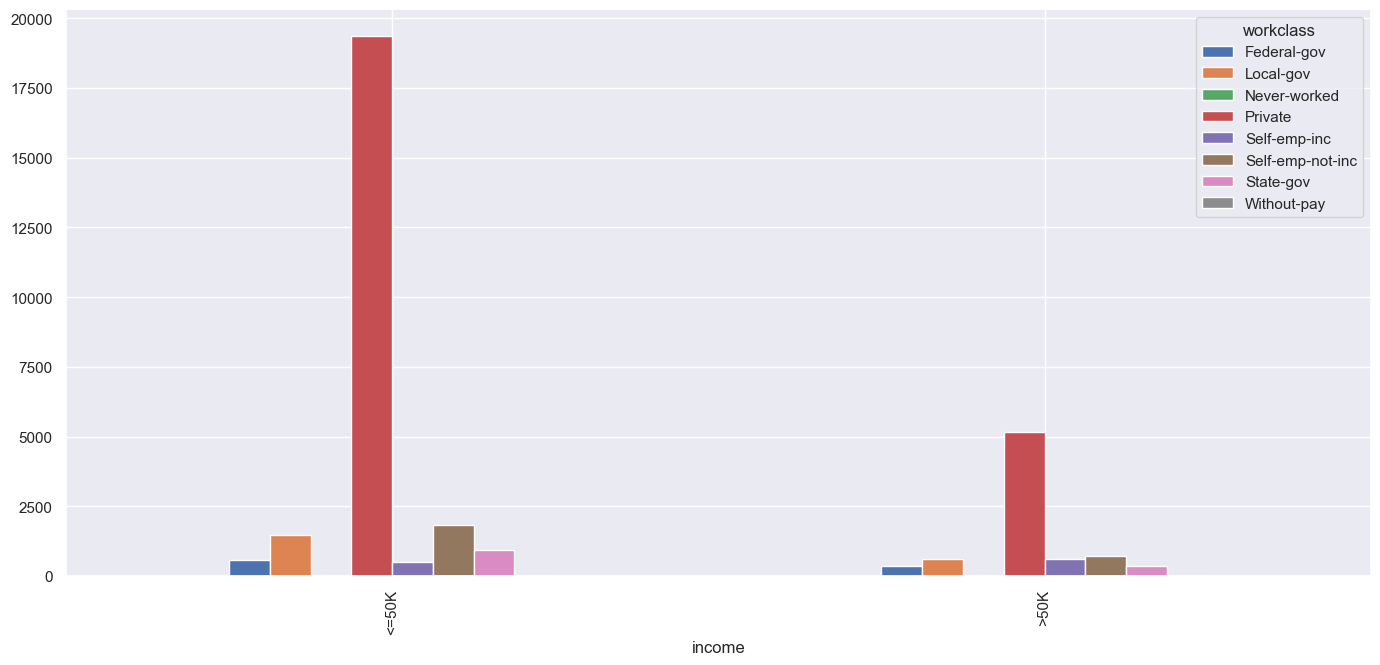

In [68]:
salary = pd.crosstab(data['income'], data['workclass'])
salary.plot(kind = 'bar')

<Axes: xlabel='income'>

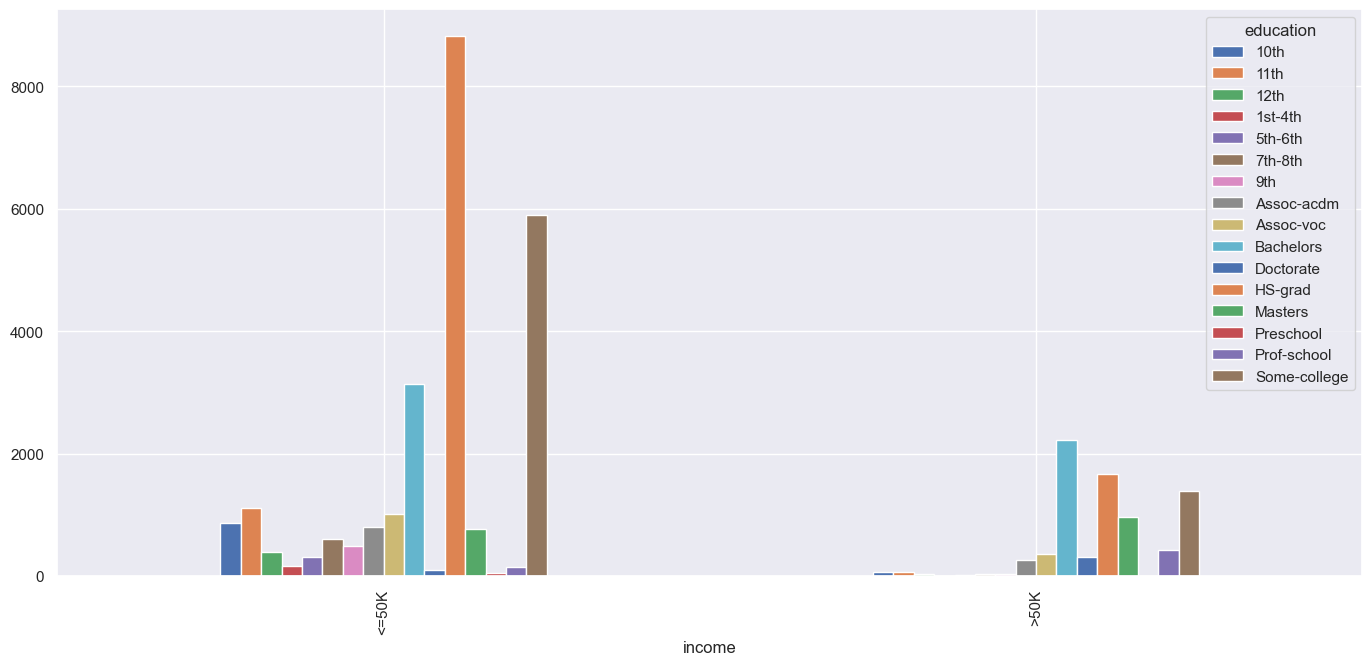

In [69]:
education = pd.crosstab(data['income'], data['education'])
education.plot(kind='bar')

<Axes: xlabel='income'>

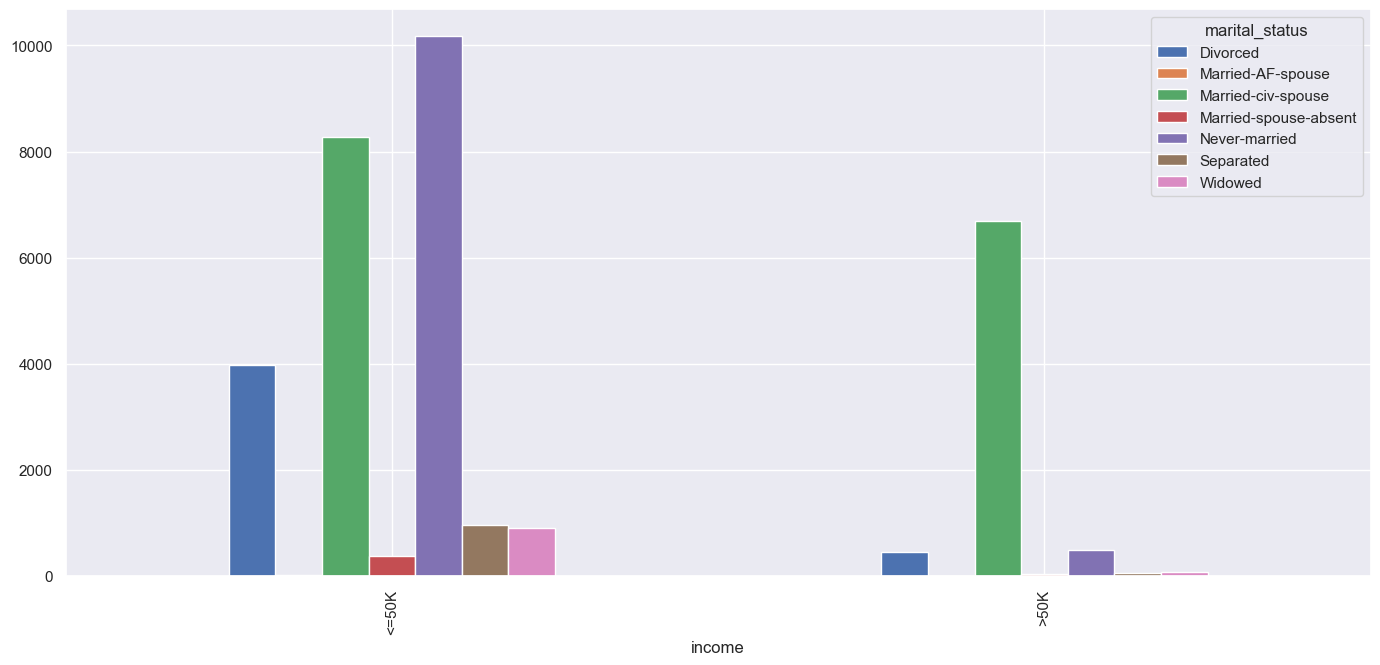

In [70]:
education = pd.crosstab(data['income'], data['marital_status'])
education.plot(kind='bar')

<Axes: xlabel='income'>

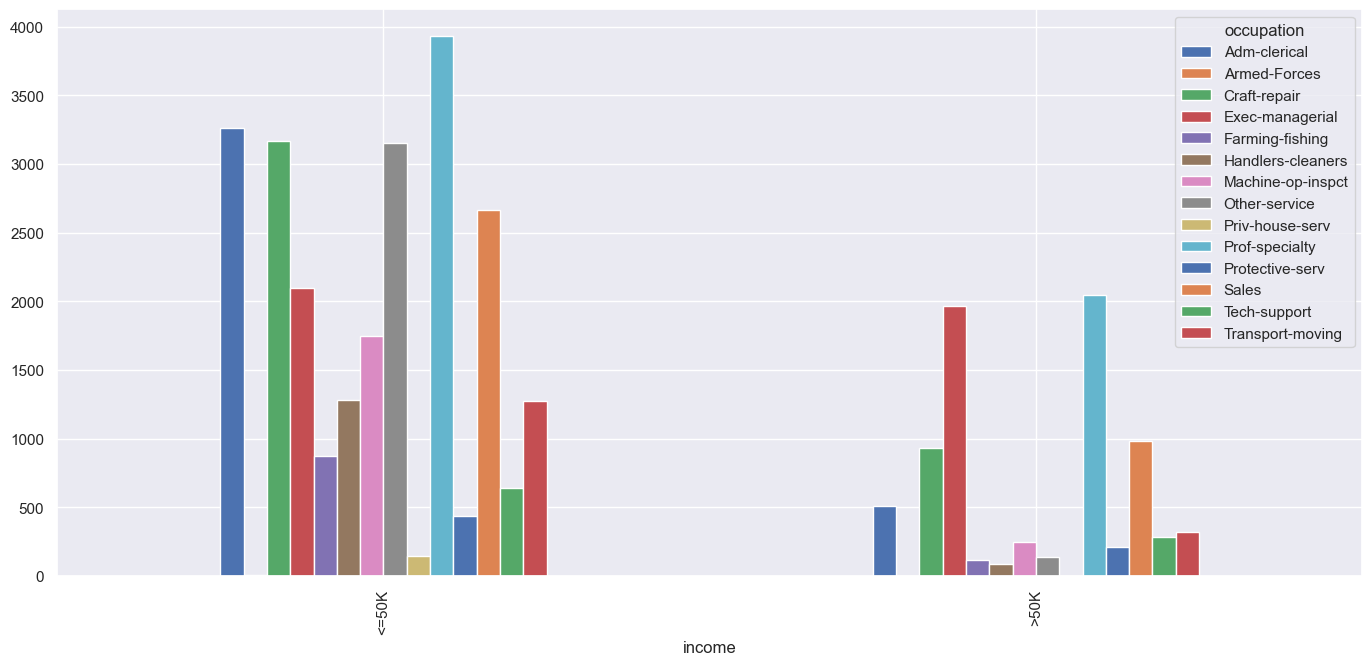

In [71]:
education = pd.crosstab(data['income'], data['occupation'])
education.plot(kind='bar')

<Axes: xlabel='income'>

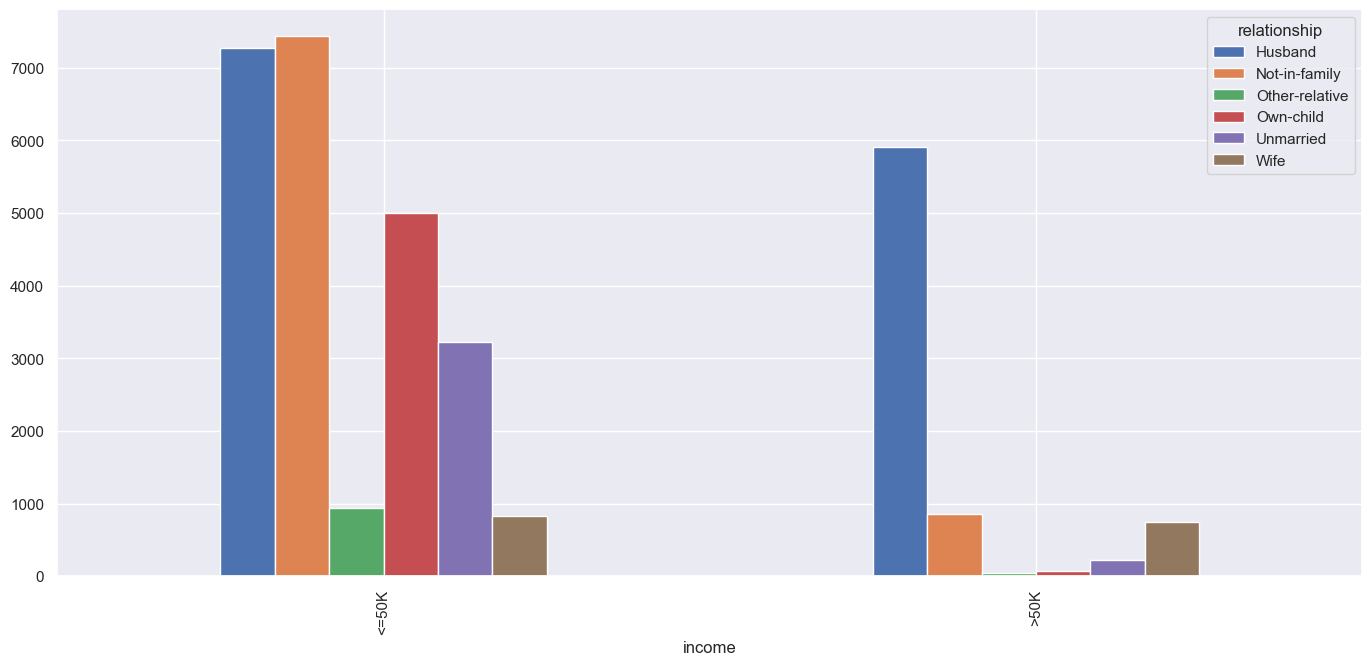

In [72]:
education = pd.crosstab(data['income'], data['relationship'])
education.plot(kind='bar')

<Axes: xlabel='income'>

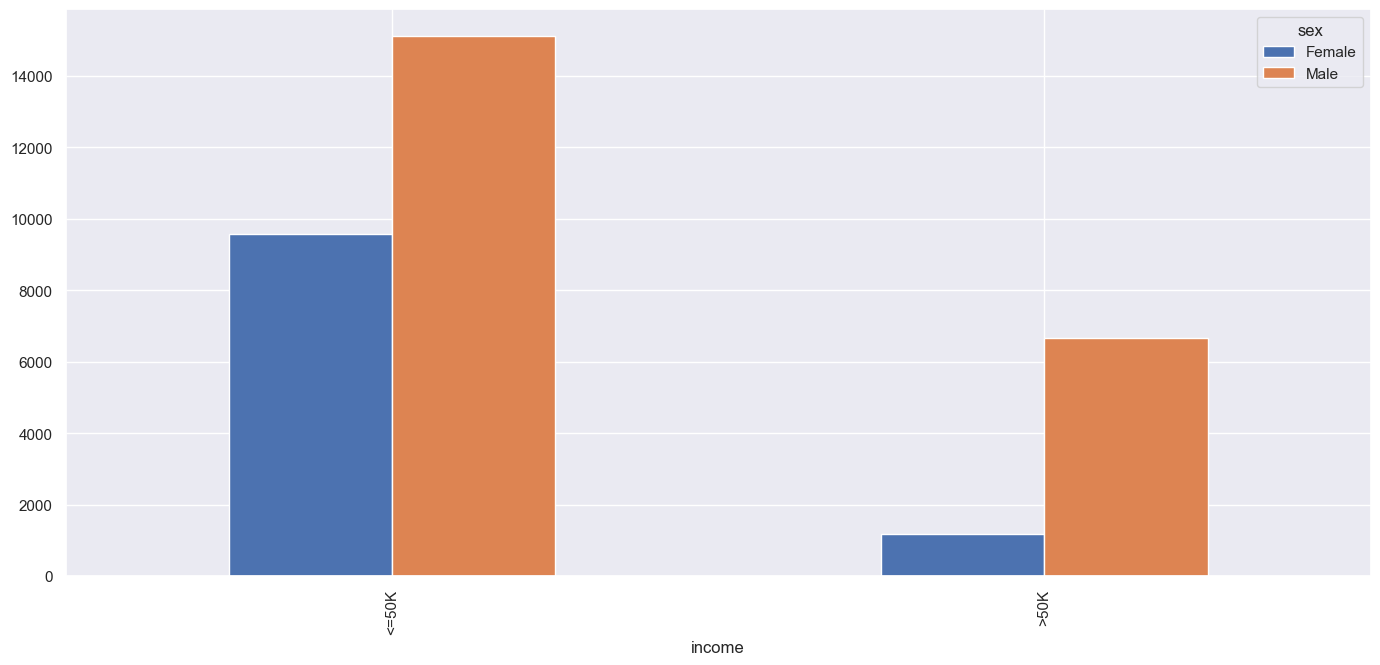

In [73]:
education = pd.crosstab(data['income'], data['sex'])
education.plot(kind='bar')

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in cat_col:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [75]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week_num,native_country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


<Axes: >

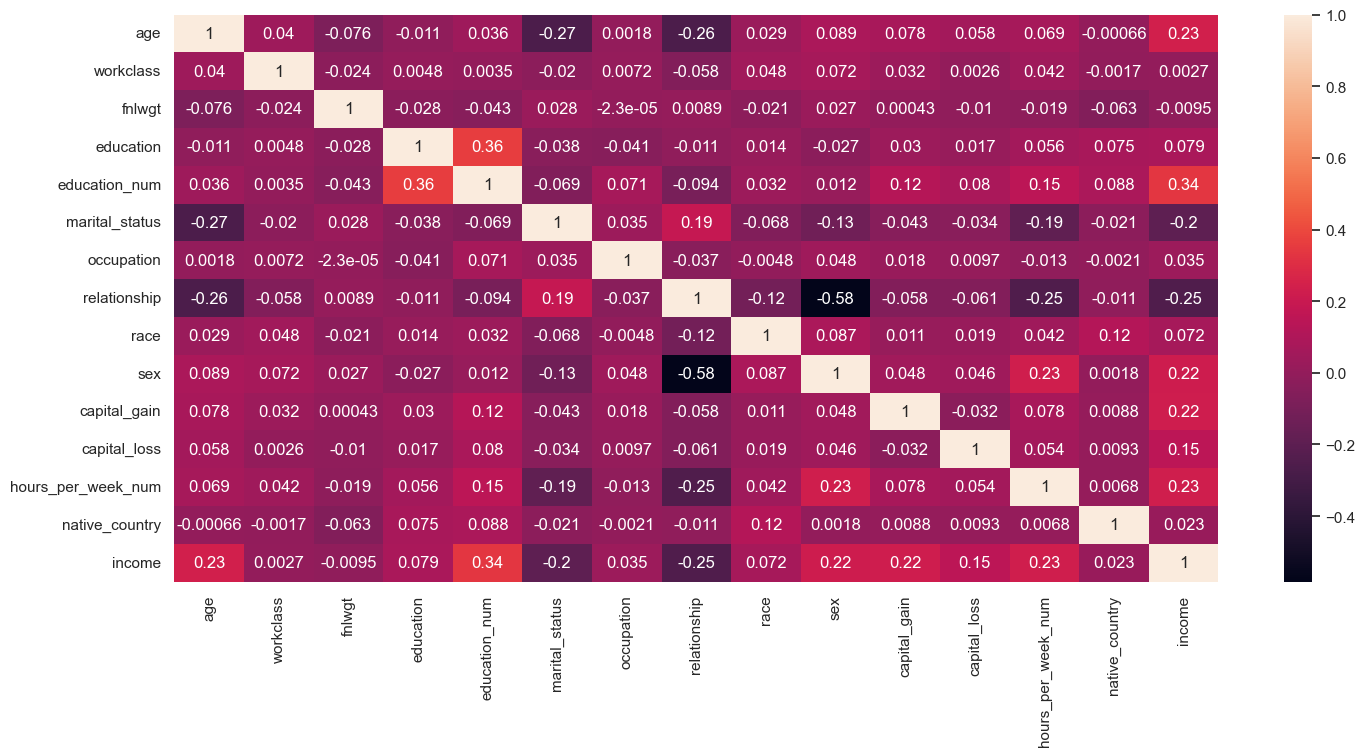

In [76]:
sns.heatmap(data.corr(),annot=True)

In [77]:
data['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [78]:
data.drop(["education","fnlwgt", "native_country"],axis=1, inplace=True)
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week_num,income
0,90,3,9,6,9,1,4,0,0,4356,40,0
1,82,3,9,6,3,1,4,0,0,4356,18,0
2,66,3,10,6,9,4,2,0,0,4356,40,0
3,54,3,4,0,6,4,4,0,0,3900,40,0
4,41,3,10,5,9,3,4,0,0,3900,40,0


In [79]:
data.to_csv("../datasets/cleaned_adult_income.csv",index=False)

In [80]:
data.shape

(32537, 12)

In [81]:
X = data.drop("income",axis=1)
y = data["income"]

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [85]:
num_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler()),
    ]
)

preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_col)
])

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 11)
(6508, 11)
(26029,)
(6508,)


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import \
    accuracy_score as acs,\
          confusion_matrix as cm,\
              precision_score as ps,\
                  recall_score as rs,\
                      f1_score as f1s,\
                          classification_report as clr,\
                            ConfusionMatrixDisplay as cmd

In [88]:
def performance_metrics(test, predict):
    confusion_matrix = print(f"CONFUSTION_MATRIX: {cm(test,predict)}")
    precision = print(f"PRECISION_SCORE: {ps(test,predict)}")
    recall = print(f"RECALL_SCORE: {rs(test,predict)}")
    f1score = print(f"F1_SCORE: {f1s(test,predict)}")
    accuracy = print(f"ACCURACY_SCORE: {acs(test,predict)}")

    return confusion_matrix, precision, recall, f1score, accuracy 

In [93]:
lr = LogisticRegression()

pram = {
    "class_weight" : ["balanced"],
    "penalty" : ["l1",'l2'],
    'C' : [0.001,0.01,0.1,1,10],
    'solver' : ['liblinear', 'saga'] 
}

grid = GridSearchCV(estimator=lr, param_grid=pram, cv=5, n_jobs=1, verbose=1)

In [94]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [96]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [97]:
grid.score(X_train,y_train)

0.7794383187982635

In [98]:
y_pred = grid.predict(X_test)

In [100]:
acs(y_test,y_pred)

0.7811923786109404

In [101]:
dr = DecisionTreeClassifier()

param_grid = {
    "class_weight" : ["balanced"],
    "criterion" : ['gini', "entropy", "log_loss"],
    "splitter" : ['best', 'random'],
    "max_depth" : [3,4,5,6],
    "min_samples_split" : [2,3,4,5],
    "min_samples_leaf" : [1,2,3],
    "max_features" : ['auto', 
                      'sqrt', 
                      'log2']
}

In [102]:
grid_search = GridSearchCV(estimator=dr, param_grid=param_grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [103]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [104]:
grid_search.score(X_train,y_train)

0.7659917784010143

In [105]:
y_pred = grid_search.predict(X_test)
acs(y_test,y_pred)

0.7552243392747388

In [111]:
print(clr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      4988
           1       0.49      0.86      0.62      1520

    accuracy                           0.76      6508
   macro avg       0.72      0.79      0.72      6508
weighted avg       0.84      0.76      0.77      6508

